<h1 style="display: flex; align-items: center;">
  WoMakersCode
  <img src="https://cdn-images-1.medium.com/v2/resize:fit:1200/1*B8rGvo7fJ7qL4uFJ_II_-w.png" alt="Python logo" width="30" style="margin-left: 10px;">
</h1>

<h1> 🦋Bootcamp Data Analytics🦋</h1>

## <font color = red>**Desafio Individual - Data Visualization**

In [2]:
# Importando os bibliotecas/pacotes
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose


import warnings
warnings.filterwarnings('ignore')
sns.set(style = "whitegrid")
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Desafio Prático 1: Visualizando Dados Diferentes

**Descrição:**

Neste desafio, suas alunas irão visualizar dados de diferentes formas utilizando Matplotlib, Seaborn e Plotly. Elas deverão criar gráficos que mostrem a distribuição dos dados, correlações entre variáveis e tendências.

### Tarefa 1: Carregar os dados de um arquivo CSV fornecido (saude.csv).

In [4]:
# Carregar os dados
df = pd.read_csv('/content/drive/MyDrive/Bootcamp Data Analytcs/dataset/saude.csv')
df

,id,age,height,weight,gender
0,1,23,170,70,M
1,2,34,160,65,F
2,3,45,175,80,M
3,4,25,165,55,F
4,5,36,180,90,M
5,6,40,170,75,F
6,7,29,155,60,F
7,8,50,160,85,M
8,9,38,175,78,F
9,10,28,168,68,M


### Tarefa 2: Criar um histograma da variável age usando Matplotlib


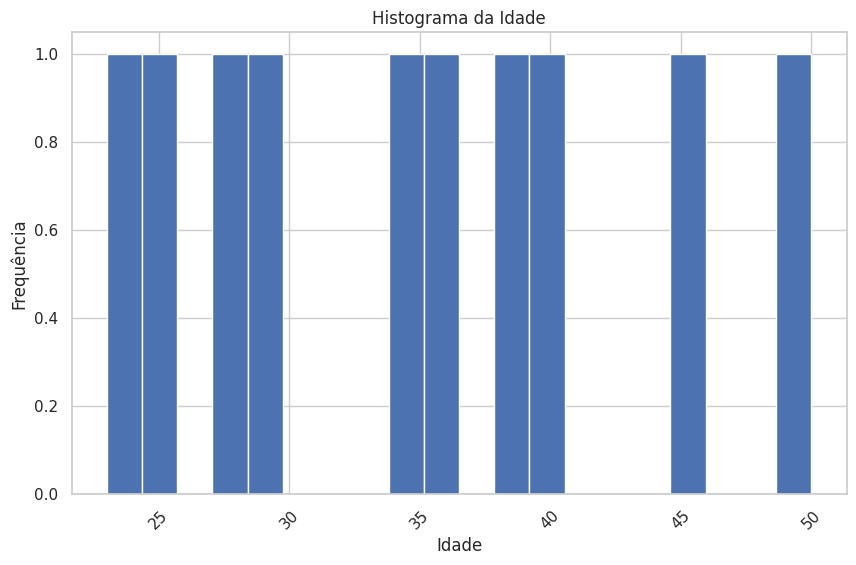

In [5]:
# Criar o histograma da variável 'age'
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=20)
plt.title('Histograma da Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()

### Tarefa 3: Criar um gráfico de dispersão mostrando a relação entre height e weight usando Seaborn


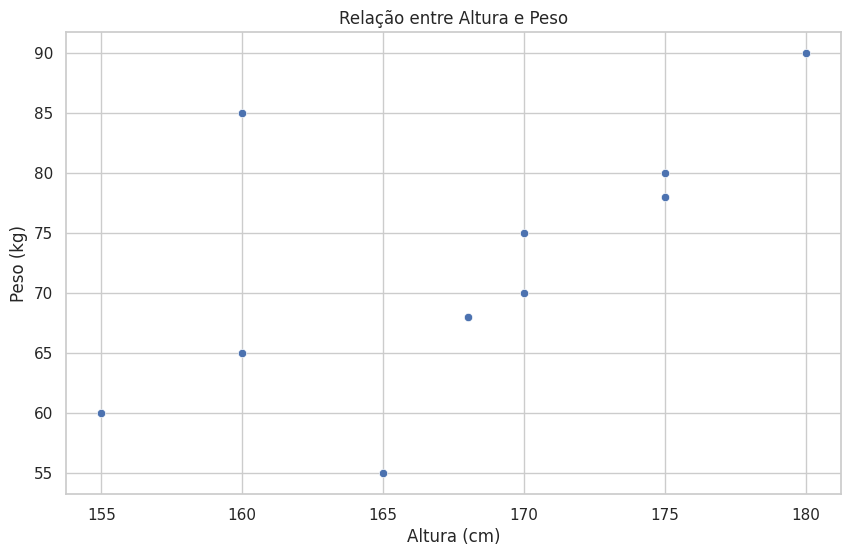

In [6]:
# Criar o gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='height', y='weight')
plt.title('Relação entre Altura e Peso')
plt.xlabel('Altura (cm)')
plt.ylabel('Peso (kg)')
plt.show()

### Tarefa 4: Criar um gráfico interativo de barras mostrando a contagem de indivíduos por gender usando Plotly


In [18]:
# Contar a quantidade de indivíduos por gênero
gender_counts = df['gender'].value_counts().reset_index()

# Renomear as colunas para corresponder aos nomes esperados
gender_counts.columns = ['gender', 'count']

# Criar o gráfico de barras interativo
fig = px.bar(gender_counts, x='gender', y='count', color='gender',
             labels={'gender': 'Gênero', 'count': 'Contagem'},
             title='Contagem de Indivíduos por Gênero')

# Mostrar o gráfico
fig.show()

# Desafio Prático 2: Séries Temporais

**Descrição:**

Neste desafio, suas alunas irão analisar uma série temporal de dados de vendas. Elas deverão criar gráficos que mostrem as vendas ao longo do tempo, identificar
tendências e sazonalidades.

### Tarefa 1: Carregar os dados de um arquivo CSV fornecido (vendas.csv)

In [8]:
# Carregar os dados
df2 = pd.read_csv('/content/drive/MyDrive/Bootcamp Data Analytcs/dataset/vendas.csv')
df2

,date,sales
0,2023-01-01,100
1,2023-01-02,150
2,2023-01-03,200
3,2023-01-04,130
4,2023-01-05,180
5,2023-01-06,220
6,2023-01-07,210
7,2023-01-08,190
8,2023-01-09,170
9,2023-01-10,200


In [9]:
# Vamos coletar o período completo da série temporal
print('Início do Período de Tempo: {}\nFinal do Período de Tempo: {}'.format(df2.date.min(), df2.date.max()))

Início do Período de Tempo: 2023-01-01
Final do Período de Tempo: 2023-01-31


In [11]:
# Convertendo a coluna date de object para datetime
dados_serie = df2['date'] = pd.to_datetime(df2['date'], format = '%Y-%m-%d')

In [12]:
# Transformar a coluna date no índice do conjunto de dados.
dados_serie = df2.set_index('date')

In [13]:
# Visualizando os Dados
dados_serie.head()

,sales
date,
2023-01-01,100
2023-01-02,150
2023-01-03,200
2023-01-04,130
2023-01-05,180


In [14]:
# Visualizando o índice
dados_serie.index

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16',
               '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
               '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24',
               '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-28',
               '2023-01-29', '2023-01-30', '2023-01-31'],
              dtype='datetime64[ns]', name='date', freq=None)

### Tarefa 2: Criar um gráfico de linhas das vendas ao longo do tempo usando Matplotlib

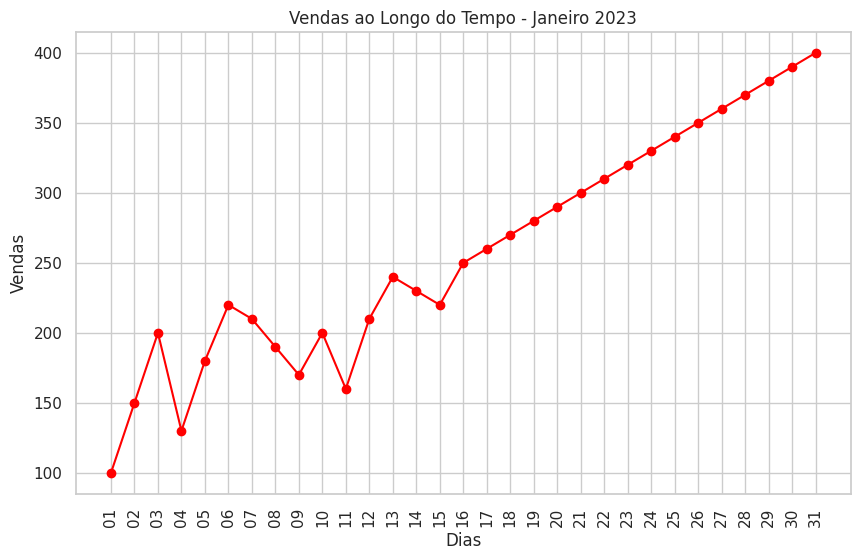

In [10]:
# Criar o gráfico de linhas das vendas ao longo do tempo
plt.figure(figsize=(10, 6))
plt.plot(df2['date'], df2['sales'], marker='o', color='red')

# Personalização dos rótulos do eixo x para mostrar somente os dias
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%d'))

# Adicionar título e rótulos
plt.title('Vendas ao Longo do Tempo - Janeiro 2023')
plt.xlabel('Dias')
plt.ylabel('Vendas')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

### Tarefa 3: Criar um gráfico de decomposição sazonal usando Seaborn


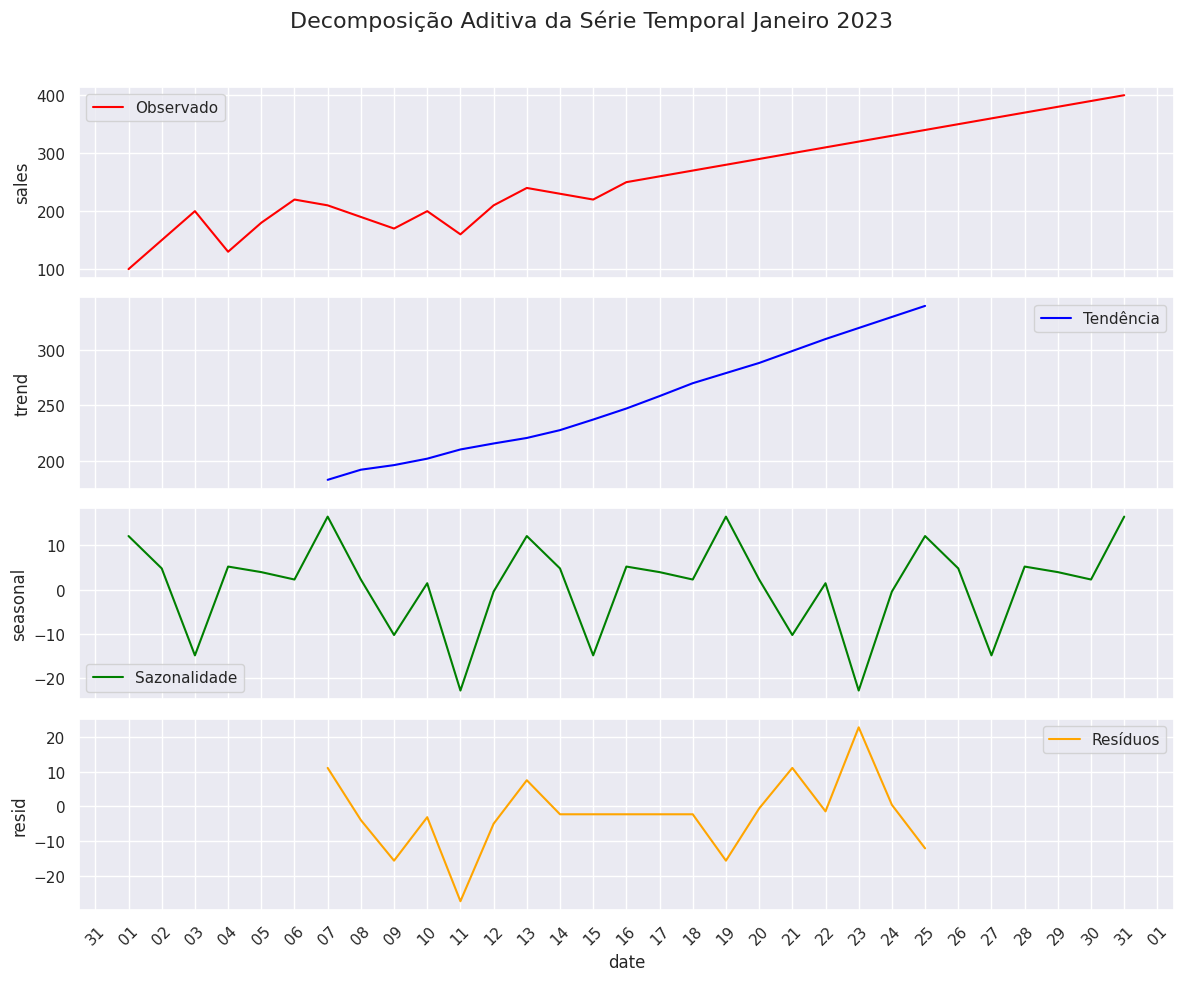

In [15]:
# Configurar o estilo do Seaborn
sns.set(style="darkgrid")

# Decompor a série temporal
decomposition = seasonal_decompose(dados_serie['sales'], model='additive', period=12)

# Criar a figura e os subplots
fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
componentes = ['observed', 'trend', 'seasonal', 'resid']
cores = ['red', 'blue', 'green', 'orange']
titulos = ['Observado', 'Tendência', 'Sazonalidade', 'Resíduos']

# Plotar os componentes da decomposição com Seaborn
for ax, componente, cor, titulo in zip(axes, componentes, cores, titulos):
    data = getattr(decomposition, componente)
    sns.lineplot(data=data, ax=ax, color=cor, label=titulo)
    ax.legend(loc='best')
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d'))

# Rotacionar os rótulos do eixo x para todos os subplots
for ax in axes:
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

# Adicionar título geral à figura
fig.suptitle('Decomposição Aditiva da Série Temporal Janeiro 2023', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Tarefa 4: Criar um gráfico interativo que permita a exploração dos dados de vendas ao longo do tempo usando Plotly

In [17]:
# Criar o gráfico interativo
fig = px.line(df2, x='date', y='sales', title='Vendas ao Longo do Tempo')
fig.show()